### Step 1: Import Required Libraries 

In [1]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Sklearn Imports
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

### Step 2: Read in csv (data) file

In [3]:
# Reading from csv as a pandas dataframe 
df = pd.read_csv('sample_data.csv')
print("Length of dataframe is:", len(df))

Length of dataframe is: 6539


In [4]:
df.head(5)

,entity,formattype,fromdate,titlecount,titles,todate,author,amazontotalreviews,minappleprice,amazontotalrevenue,...,lumpedpreorderrevenue,amazonsoldunits,amazonpreordersubscriptionrevenue,preordersubscriptionunits,amazonpreordersalesrevenue,maxappleprice,pagelength,pricewassetbypublisher,barnesandnobledistributor,appledistributor
0,Alone in the dark,print,20170418,1,"{'amazontotalreviews': 306, 'minappleprice': 0...",20170419,Frith Banbury,306.0,0,0,...,0,6,0,0,0,0,NaN,NaN,NaN,NaN
1,Alone in the dark,print,20170419,1,"{'amazontotalreviews': 306, 'minappleprice': 0...",20170420,Frith Banbury,306.0,0,702,...,0,7,0,0,0,0,NaN,NaN,NaN,NaN
2,Alone in the dark,print,20170420,1,"{'amazontotalreviews': 306, 'minappleprice': 0...",20170421,Frith Banbury,306.0,0,4914,...,0,7,0,0,0,0,NaN,NaN,NaN,NaN
3,Alone in the dark,print,20170421,1,"{'amazontotalreviews': 306, 'minappleprice': 0...",20170422,Frith Banbury,306.0,0,4212,...,0,6,0,0,0,0,NaN,NaN,NaN,NaN
4,Alone in the dark,print,20170422,1,"{'amazontotalreviews': 306, 'minappleprice': 0...",20170423,Frith Banbury,306.0,0,702,...,0,1,0,0,0,0,NaN,NaN,NaN,NaN


### Step 3: Cleaning the dataframe

In [5]:
# Viewing total columns of the dataframe
df.columns.tolist()

['entity',
 'formattype',
 'fromdate',
 'titlecount',
 'titles',
 'todate',
 'author',
 'amazontotalreviews',
 'minappleprice',
 'amazontotalrevenue',
 'accruedpreordersoldunits',
 'amazonlumpedpreordersubscriptionrevenue',
 'preordersalesrevenue',
 'foundatamazon',
 'barnesandnobleaccruedpreorderrevenue',
 'amazonpreordersubscriptionunits',
 'amazonlumpedpreordersalesrevenue',
 'foundatbarnesandnoble',
 'maxprice',
 'lumpedpreordersubscriptionunits',
 'applepreorderrevenue',
 'amazontotalunits',
 'totalrevenue',
 'barnesandnobleaccruedpreorderunits',
 'preorderunits',
 'amazonsubscriptionrevenue',
 'amazonlumpedpreorderrevenue',
 'maxbarnesandnoblelistprice',
 'maxlistprice',
 'barnesandnoblesoldunits',
 'maxapplelistprice',
 'amazonaccruedpreordersubscriptionrevenue',
 'accruedpreordersubscriptionunits',
 'amazonkenpread',
 'applesoldunits',
 'minamazonlistprice',
 'minprice',
 'bookscanreported',
 'appleaccruedpreorderunits',
 'preorderperiod',
 'datepublished',
 'lumpedpreordersold

In [6]:
# Stats of the dataframe
df.describe()

,fromdate,titlecount,todate,amazontotalreviews,minappleprice,amazontotalrevenue,accruedpreordersoldunits,amazonlumpedpreordersubscriptionrevenue,preordersalesrevenue,foundatamazon,...,preorderrevenue,pubtrackreported,lumpedpreorderrevenue,amazonsoldunits,amazonpreordersubscriptionrevenue,preordersubscriptionunits,amazonpreordersalesrevenue,maxappleprice,pagelength,pricewassetbypublisher
count,6.539000e+03,6539.000000,6.539000e+03,6522.000000,6539.000000,6539.000000,6539.000000,6539.0,6539.000000,6539.000000,...,6539.000000,6539.000000,6539.000000,6539.000000,6539.0,6539.0,6539.000000,6539.000000,2558.000000,1531.0
mean,2.018078e+07,1.599174,2.018080e+07,242.896044,118.859459,18074.906866,0.235204,0.0,155.503288,0.998165,...,155.503288,0.984095,155.503288,17.666004,0.0,0.0,155.503288,118.859459,336.532447,1.0
std,7.319859e+03,0.748654,7.321285e+03,57.042772,323.464108,30999.078107,2.776806,0.0,8769.366153,0.042803,...,8769.366153,0.125116,8769.366153,36.272170,0.0,0.0,8769.366153,323.464108,42.531144,0.0
min,2.017040e+07,1.000000,2.017040e+07,120.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,305.000000,1.0
25%,2.017121e+07,1.000000,2.017121e+07,200.000000,0.000000,1998.000000,0.000000,0.0,0.000000,1.000000,...,0.000000,1.000000,0.000000,1.000000,0.0,0.0,0.000000,0.000000,320.000000,1.0
50%,2.018071e+07,1.000000,2.018071e+07,250.000000,0.000000,7191.000000,0.000000,0.0,0.000000,1.000000,...,0.000000,1.000000,0.000000,6.000000,0.0,0.0,0.000000,0.000000,321.000000,1.0
75%,2.019013e+07,2.000000,2.019013e+07,283.000000,0.000000,17982.000000,0.000000,0.0,0.000000,1.000000,...,0.000000,1.000000,0.000000,13.000000,0.0,0.0,0.000000,0.000000,321.000000,1.0
max,2.019083e+07,4.000000,2.019083e+07,331.000000,999.000000,571692.000000,82.000000,0.0,501420.000000,1.000000,...,501420.000000,1.000000,501420.000000,781.000000,0.0,0.0,501420.000000,999.000000,496.000000,1.0


In [7]:
# Checking all the Null entries in the datafame
not_null_values = []
for col in df.columns:
    tmp = df[col].isnull().sum()
    if tmp != 0: not_null_values.append((col,tmp))
    print(col,tmp)    

entity 0
formattype 0
fromdate 0
titlecount 0
titles 0
todate 0
author 0
amazontotalreviews 17
minappleprice 0
amazontotalrevenue 0
accruedpreordersoldunits 0
amazonlumpedpreordersubscriptionrevenue 0
preordersalesrevenue 0
foundatamazon 0
barnesandnobleaccruedpreorderrevenue 0
amazonpreordersubscriptionunits 0
amazonlumpedpreordersalesrevenue 0
foundatbarnesandnoble 0
maxprice 0
lumpedpreordersubscriptionunits 0
applepreorderrevenue 0
amazontotalunits 0
totalrevenue 0
barnesandnobleaccruedpreorderunits 0
preorderunits 0
amazonsubscriptionrevenue 0
amazonlumpedpreorderrevenue 0
maxbarnesandnoblelistprice 0
maxlistprice 0
barnesandnoblesoldunits 0
maxapplelistprice 0
amazonaccruedpreordersubscriptionrevenue 0
accruedpreordersubscriptionunits 0
amazonkenpread 0
applesoldunits 0
minamazonlistprice 0
minprice 0
bookscanreported 0
appleaccruedpreorderunits 0
preorderperiod 0
datepublished 0
lumpedpreordersoldunits 0
accruedpreorderrevenue 0
maxamazonlistprice 0
amazonaccruedpreorderrevenue 

In [8]:
not_null_values # Column name and how many null entries present in the respective column

[('amazontotalreviews', 17),
 ('amazonaveragerating', 16),
 ('amazoncategories', 5),
 ('formats', 1),
 ('pagelength', 3981),
 ('pricewassetbypublisher', 5008),
 ('barnesandnobledistributor', 4804),
 ('appledistributor', 5783)]

In [9]:
# Creatign a new dataframe of only Null values 
df_null_entries = df[[item[0] for item in not_null_values]]

In [10]:
df_null_entries.head(10)

,amazontotalreviews,amazonaveragerating,amazoncategories,formats,pagelength,pricewassetbypublisher,barnesandnobledistributor,appledistributor
0,306.0,410.0,Books > Books on CD > Mystery & Thrillers ; Bo...,Audio CD,NaN,NaN,NaN,NaN
1,306.0,410.0,Books > Books on CD > Mystery & Thrillers ; Bo...,Audio CD,NaN,NaN,NaN,NaN
2,306.0,410.0,Books > Books on CD > Mystery & Thrillers ; Bo...,Audio CD,NaN,NaN,NaN,NaN
3,306.0,410.0,Books > Books on CD > Mystery & Thrillers ; Bo...,Audio CD,NaN,NaN,NaN,NaN
4,306.0,410.0,Books > Books on CD > Mystery & Thrillers ; Bo...,Audio CD,NaN,NaN,NaN,NaN
5,307.0,440.0,Books > Books on CD > Mystery & Thrillers ; Bo...,Audio CD,NaN,NaN,NaN,NaN
6,307.0,440.0,Books > Books on CD > Mystery & Thrillers ; Bo...,Audio CD,NaN,NaN,NaN,NaN
7,307.0,440.0,Books > Books on CD > Mystery & Thrillers ; Bo...,Audio CD,NaN,NaN,NaN,NaN
8,307.0,440.0,Books > Books on CD > Mystery & Thrillers ; Bo...,Audio CD,NaN,NaN,NaN,NaN
9,307.0,440.0,Books > Books on CD > Mystery & Thrillers ; Bo...,Audio CD,NaN,NaN,NaN,NaN


In [11]:
df_null_entries.describe()

,amazontotalreviews,amazonaveragerating,pagelength,pricewassetbypublisher
count,6522.000000,6523.000000,2558.000000,1531.0
mean,242.896044,453.302162,336.532447,1.0
std,57.042772,13.736645,42.531144,0.0
min,120.000000,410.000000,305.000000,1.0
25%,200.000000,440.000000,320.000000,1.0
50%,250.000000,460.000000,321.000000,1.0
75%,283.000000,470.000000,321.000000,1.0
max,331.000000,470.000000,496.000000,1.0


In [12]:
print("""
Amazon Total Reviews: Replace Null by Mean
Amazon Average Rating: Replace Null by Mean
Page Length: Replace Null by Mean
Price Was Set By Publisher: Replace Null by Mean
Barnes and Noble Distributor: Replace by Mode
Apple Distributor: Replace by Mode
Amazon Category: Replace by Mode
Formats: Replace by Mode
""")


Amazon Total Reviews: Replace Null by Mean
Amazon Average Rating: Replace Null by Mean
Page Length: Replace Null by Mean
Price Was Set By Publisher: Replace Null by Mean
Barnes and Noble Distributor: Replace by Mode
Apple Distributor: Replace by Mode
Amazon Category: Replace by Mode
Formats: Replace by Mode



In [13]:
df['amazontotalreviews'].fillna(df['amazontotalreviews'].mean(), inplace=True)
df['amazonaveragerating'].fillna(df['amazonaveragerating'].mean(), inplace=True)
df['pagelength'].fillna(df['pagelength'].mean(), inplace=True)
df['pricewassetbypublisher'].fillna(df['pricewassetbypublisher'].mean(), inplace=True)
df['barnesandnobledistributor'].fillna(df['barnesandnobledistributor'].mode().iloc[0], inplace=True)
df['appledistributor'].fillna(df['appledistributor'].mode().iloc[0], inplace=True)
df['formats'].fillna(df['formats'].mode().iloc[0], inplace=True)
df['amazoncategories'].fillna(df['amazoncategories'].mode().iloc[0], inplace=True)

In [14]:
# Checking for Null values 
for col in df.columns:
    tmp = df[col].isnull().sum()
    print(col,tmp)

entity 0
formattype 0
fromdate 0
titlecount 0
titles 0
todate 0
author 0
amazontotalreviews 0
minappleprice 0
amazontotalrevenue 0
accruedpreordersoldunits 0
amazonlumpedpreordersubscriptionrevenue 0
preordersalesrevenue 0
foundatamazon 0
barnesandnobleaccruedpreorderrevenue 0
amazonpreordersubscriptionunits 0
amazonlumpedpreordersalesrevenue 0
foundatbarnesandnoble 0
maxprice 0
lumpedpreordersubscriptionunits 0
applepreorderrevenue 0
amazontotalunits 0
totalrevenue 0
barnesandnobleaccruedpreorderunits 0
preorderunits 0
amazonsubscriptionrevenue 0
amazonlumpedpreorderrevenue 0
maxbarnesandnoblelistprice 0
maxlistprice 0
barnesandnoblesoldunits 0
maxapplelistprice 0
amazonaccruedpreordersubscriptionrevenue 0
accruedpreordersubscriptionunits 0
amazonkenpread 0
applesoldunits 0
minamazonlistprice 0
minprice 0
bookscanreported 0
appleaccruedpreorderunits 0
preorderperiod 0
datepublished 0
lumpedpreordersoldunits 0
accruedpreorderrevenue 0
maxamazonlistprice 0
amazonaccruedpreorderrevenue 0

In [15]:
print("No Null values prresent anymore")

No Null values prresent anymore


### Step 4: Plotting Graphs/ Data-visulaization

Text(0.5, 1.0, 'Authors vs Preorder Sale Revenue')

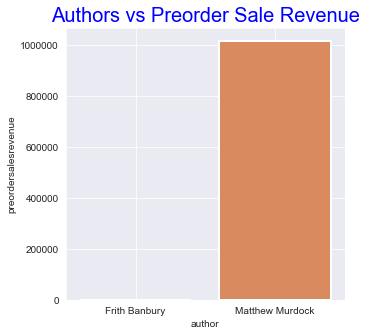

In [16]:
# Author vs Preorder Sale Revenue
plt.figure(figsize = (5,5))
sns.set_style("darkgrid")
authors = df.groupby('author')['preordersalesrevenue'].sum().reset_index()
authors['author'] = authors['author'].astype(object)
authors['preordersalesrevenue'] = authors['preordersalesrevenue'].astype(int)
sns.barplot(authors['author'], authors['preordersalesrevenue'],  linewidth = 2,  palette = "muted")
plt.grid(True)
plt.title("Authors vs Preorder Sale Revenue", color='b', fontsize = 20, loc = 'center' )

Text(0.5, 1.0, 'Authors vs Title Count')

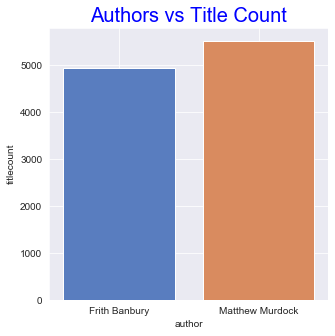

In [17]:
# Author vs Title Count
plt.figure(figsize = (5,5))
sns.set_style("darkgrid")
title_count = df.groupby('author')['titlecount'].sum().reset_index()
title_count['author'] = title_count['author'].astype(object)
title_count['titlecount'] = title_count['titlecount'].astype(int)
sns.barplot(title_count['author'], title_count['titlecount'],  linewidth = 1,  palette = "muted")
plt.grid(True)
plt.title("Authors vs Title Count", color='b', fontsize = 20, loc = 'center' )

Text(0.5, 1.0, 'Authors vs Found at Amazon')

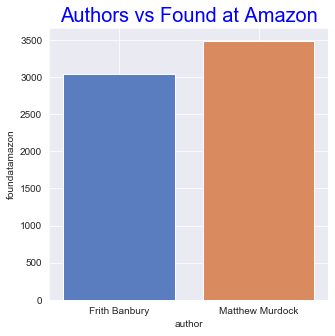

In [18]:
# Author vs Found at Amazon
plt.figure(figsize = (5,5))
sns.set_style("darkgrid")
fd_amazon = df.groupby('author')['foundatamazon'].sum().reset_index()
fd_amazon['author'] = fd_amazon['author'].astype(object)
fd_amazon['foundatamazon'] = fd_amazon['foundatamazon'].astype(int)
sns.barplot(fd_amazon['author'], fd_amazon['foundatamazon'],  linewidth = 1,  palette = "muted")
plt.grid(True)
plt.title("Authors vs Found at Amazon", color='b', fontsize = 20, loc = 'center')

Text(0.5, 1.0, 'Authors vs Barnes and Noble')

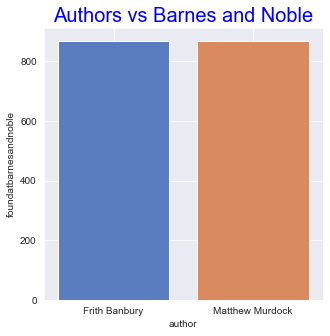

In [19]:
# Author vs Found at Barnes and Noble
plt.figure(figsize = (5,5))
sns.set_style("darkgrid")
fd_BandA = df.groupby('author')['foundatbarnesandnoble'].sum().reset_index()
fd_BandA['author'] = fd_BandA['author'].astype(object)
fd_BandA['foundatbarnesandnoble'] = fd_BandA['foundatbarnesandnoble'].astype(int)
sns.barplot(fd_BandA['author'], fd_BandA['foundatbarnesandnoble'],  linewidth = 1,  palette = "muted")
plt.grid(True)
plt.title("Authors vs Barnes and Noble", color='b', fontsize = 20, loc = 'center')

<Figure size 360x360 with 0 Axes>

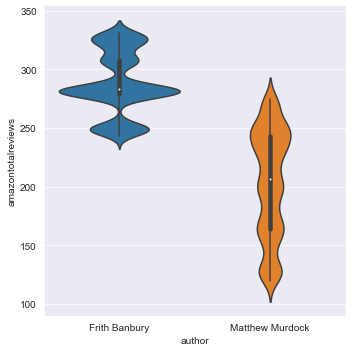

In [20]:
# Author vs Amazon Total Reviews
plt.figure(figsize = (5,5))
sns.catplot(x='author', y='amazontotalreviews', kind = 'violin', data=df)

In [21]:
df['amazontotalreviews'].describe()

count    6539.000000
mean      242.896044
std        56.968563
min       120.000000
25%       200.000000
50%       250.000000
75%       283.000000
max       331.000000
Name: amazontotalreviews, dtype: float64

In [22]:
df['publisherparent'].unique()

array(['Simon & Schuster', 'Pocket',
       'Simon & Schuster Audio and Blackstone Audio'], dtype=object)

In [23]:
df['publishertype'].unique()

array(['bigfive', 'uncategorizedmanyauthor'], dtype=object)

In [24]:
print(df['totalrevenue'].unique()) 
print(df['salesrevenue'].unique())

[    0   702  4914 ... 86528 81835 80340]
[    0   702  4914 ... 38376 43173 39975]


(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

<Figure size 1440x720 with 0 Axes>

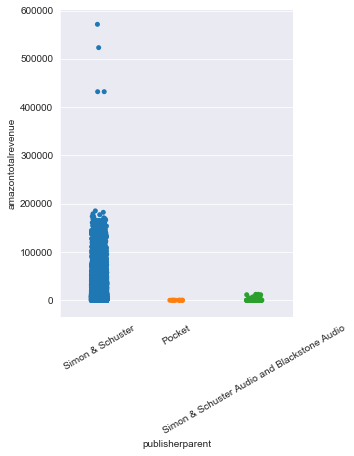

In [25]:
# Publisher Parent vs Amazon Total Revenue
plt.figure(figsize = (20,10))
sns.catplot(x='publisherparent', y='amazontotalrevenue', kind = 'strip', data=df)
plt.xticks(rotation=30)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

<Figure size 1440x720 with 0 Axes>

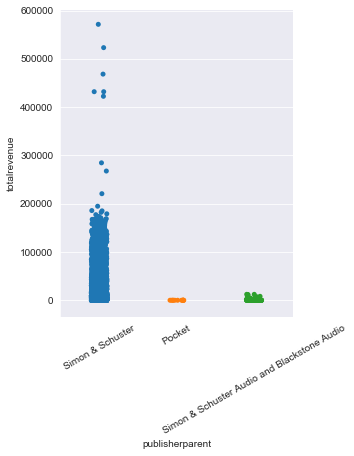

In [26]:
# Publisher Parent vs Total Revenue
plt.figure(figsize = (20,10))
sns.catplot(x='publisherparent', y='totalrevenue', kind = 'strip', data=df)
plt.xticks(rotation=30)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

<Figure size 1440x720 with 0 Axes>

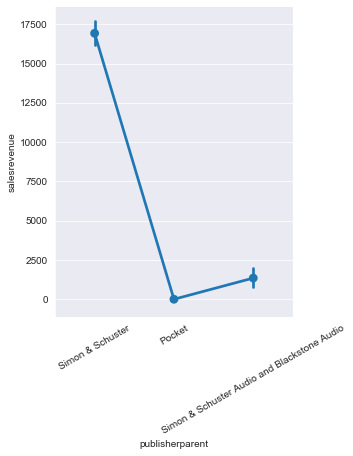

In [27]:
# Publisher Parent vs Sales Revenue
plt.figure(figsize = (20,10))
sns.catplot(x='publisherparent', y='salesrevenue', kind = 'point', data=df)
plt.xticks(rotation=30)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

<Figure size 1440x720 with 0 Axes>

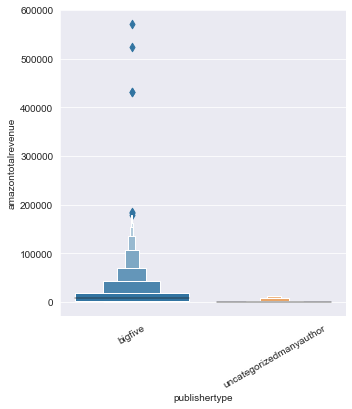

In [28]:
# Publisher Type vs Amazon totalrvenue
plt.figure(figsize = (20,10))
sns.catplot(x='publishertype', y='amazontotalrevenue', kind = 'boxen', data=df)
plt.xticks(rotation=30)

In [29]:
df['formattype'].unique()

array(['print', 'ebook', 'audio'], dtype=object)

### Step 5: Converting all categorical data to numerical data uing Label Encoder

In [30]:
# Getting location of all categorical columns/ fetaures
    
tmp = [df.columns.get_loc(col) for col in df.select_dtypes(include=['object'])]
tmp

[0, 1, 4, 6, 40, 57, 61, 70, 78, 104, 105]

In [31]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
for i in tmp:
    df.iloc[:,i] = lb.fit_transform(df.iloc[:,i]).astype('float64')
    

### Step 6: Feature Extraction 

In [32]:
"""
Since there are 106 columns, I'm checking for correlations between them. 
Correlation in simple terms means close linear relationship between two features so that one feature can be dropped. 
I'm dropping all the features having correlation greater than equal to 0.9.
"""
correlation = df.corr()

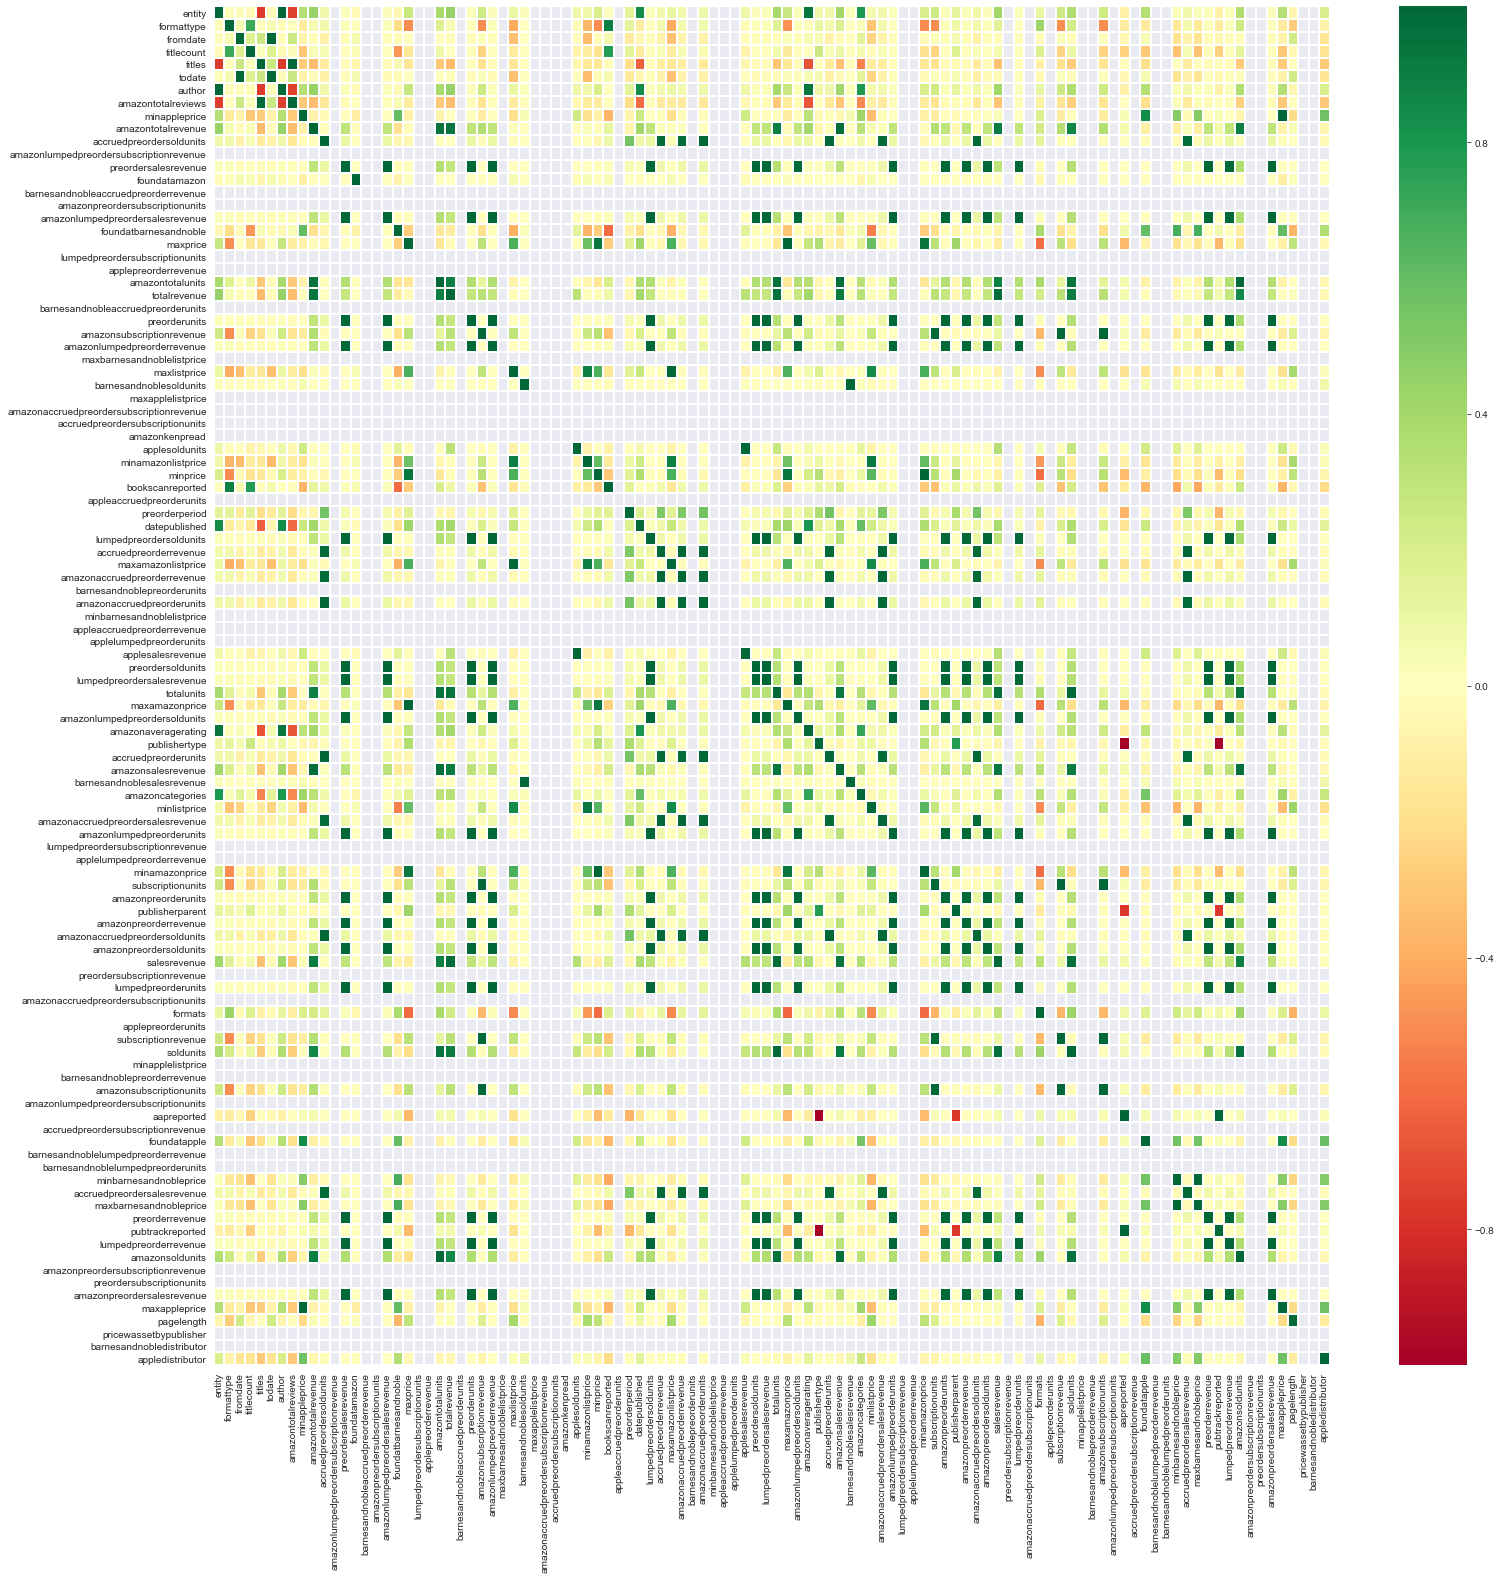

In [33]:
plt.figure(figsize =(25,25))
sns.heatmap(df[correlation.index].corr(),cmap="RdYlGn",linewidths=1.0)

In [34]:
columns = np.full((correlation.shape[0],), True, dtype=bool)
#print(columns_copy.shape)
for i in range(correlation.shape[0]):
    for j in range(i+1, correlation.shape[0]):
        if correlation.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
#print(columns.shape)

columns_to_consider = df.columns[columns]

df = df[columns_to_consider]
#print(len(df))"""

In [35]:
df.shape

(6539, 58)

In [36]:
df.columns

Index(['entity', 'formattype', 'fromdate', 'titlecount', 'titles',
       'minappleprice', 'amazontotalrevenue', 'accruedpreordersoldunits',
       'amazonlumpedpreordersubscriptionrevenue', 'preordersalesrevenue',
       'foundatamazon', 'barnesandnobleaccruedpreorderrevenue',
       'amazonpreordersubscriptionunits', 'foundatbarnesandnoble', 'maxprice',
       'lumpedpreordersubscriptionunits', 'applepreorderrevenue',
       'barnesandnobleaccruedpreorderunits', 'amazonsubscriptionrevenue',
       'maxbarnesandnoblelistprice', 'maxlistprice', 'barnesandnoblesoldunits',
       'maxapplelistprice', 'amazonaccruedpreordersubscriptionrevenue',
       'accruedpreordersubscriptionunits', 'amazonkenpread', 'applesoldunits',
       'appleaccruedpreorderunits', 'preorderperiod', 'datepublished',
       'barnesandnoblepreorderunits', 'minbarnesandnoblelistprice',
       'appleaccruedpreorderrevenue', 'applelumpedpreorderunits',
       'publishertype', 'amazoncategories',
       'lumpedpreorder

In [37]:
df['formattype'].unique().shape[0]

3

### Step 7: Creating Dataset for Model Training

In [38]:
"""
Here I'm considering this as a Classification task. There are 3 unique classess in "Format Type". So this becomes my 
ground truth/ labels/ dependent varible. Rest of the 57 columns are the independent varibales.
"""
y = df.iloc[:,1].values
X = df.drop('formattype',axis=1,inplace=True)
X = df.iloc[:,:].values

X = np.array(X)
y = np.array(y).astype(int)
print("Shape of X is:", X.shape)
print("Shape of y is:", y.shape)

Shape of X is: (6539, 57)
Shape of y is: (6539,)


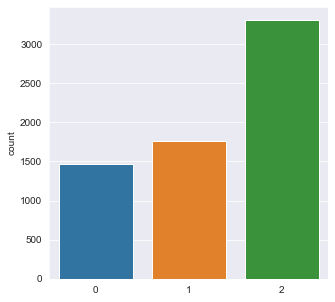

In [39]:
plt.figure(figsize =(5,5))
sns.countplot(y)

In [40]:
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size = 0.2,random_state = 27) 

sc = StandardScaler() 
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)

print("Shape of X is:", X_train.shape)
print("Shape of y is:", X_val.shape)

Shape of X is: (5231, 57)
Shape of y is: (1308, 57)


In [41]:
y

array([2, 2, 2, ..., 0, 0, 0])

In [42]:
def plot_ground_truth(label,name=None):
    print(name)
    plt.figure(figsize =(5,5))
    sns.countplot(label)

Y Train


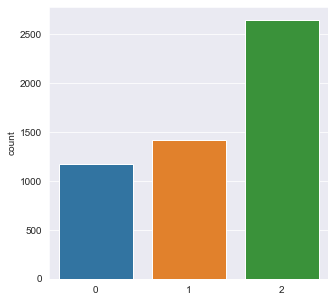

In [43]:
plot_ground_truth(y_train, name="Y Train")

Y Validation


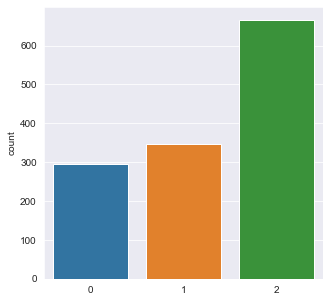

In [44]:
plot_ground_truth(y_val, name="Y Validation")

Using TensorFlow backend.


Y Train Oversampled


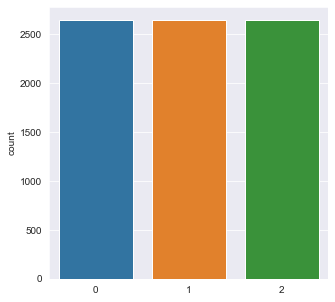

In [45]:
from imblearn.over_sampling import RandomOverSampler

rm = RandomOverSampler(sampling_strategy='auto',random_state=12)
X_train, y_train = rm.fit_sample(X_train, y_train)

plot_ground_truth(y_train, name="Y Train Oversampled")


In [46]:
X_train.shape[0]

7932

In [47]:
import import_ipynb
#import LR_Regularization_Dropout_Adam 
from LR_Regularization_Dropout_Adam import *

importing Jupyter notebook from LR_Regularization_Dropout_Adam.ipynb


In [48]:
Output_classes = np.unique(y_train).shape[0]
Output_classes

3

Cost after iteration 0: 0.983463
Cost after iteration 10: 0.335382
Cost after iteration 20: 0.152034
Cost after iteration 30: 0.091182
Cost after iteration 40: 0.066396
Cost after iteration 50: 0.054601
Cost after iteration 60: 0.047949
Cost after iteration 70: 0.043921
Cost after iteration 80: 0.041224
Cost after iteration 90: 0.038755
Cost after iteration 100: 0.036834
Cost after iteration 110: 0.034667
Cost after iteration 120: 0.033150
Cost after iteration 130: 0.032219
Cost after iteration 140: 0.031553
Cost after iteration 150: 0.031070
Cost after iteration 160: 0.030820
Cost after iteration 170: 0.030636
Cost after iteration 180: 0.030510
Cost after iteration 190: 0.030432


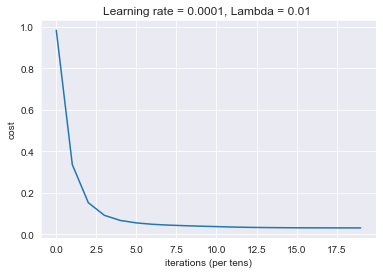

In [49]:
learned_parameters = L_layer_model(X_train, y_train,Output_classes, layers_dims=[X_train.shape[1],29,Output_classes], predict_result=False,activation_type="multiclass", reg_type="l2",keep_prob=0.5, mini_batch_size=64, n=1, learning_rate = 0.0001,lambd=0.01, num_epochs =200)

In [50]:
def result(X_result,learned_parameters,y_result,name=None):
    print(name)
    y_pred = predict(X_result, learned_parameters, y_result,Output_classes,keep_prob=1,predict_result=False, activation_type="multiclass" ,flags="y_is_present")
    print(np.unique(y_pred), y_pred.shape)
    
    print(classification_report(y_result, y_pred))
    print(confusion_matrix(y_result, y_pred))

In [51]:
result(X_train,learned_parameters,y_train,name="Training Information")

Training Information
Accuracy:99.53%
[0 1 2] (7932,)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2644
           1       1.00      0.99      0.99      2644
           2       0.99      1.00      0.99      2644

    accuracy                           1.00      7932
   macro avg       1.00      1.00      1.00      7932
weighted avg       1.00      1.00      1.00      7932

[[2638    0    6]
 [   0 2613   31]
 [   0    0 2644]]


In [52]:
result(X_val,learned_parameters,y_val,name="Validation Information")

Validation Information
Accuracy:99.69%
[0 1 2] (1308,)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       296
           1       1.00      0.99      0.99       346
           2       0.99      1.00      1.00       666

    accuracy                           1.00      1308
   macro avg       1.00      1.00      1.00      1308
weighted avg       1.00      1.00      1.00      1308

[[296   0   0]
 [  0 342   4]
 [  0   0 666]]


# Conclusion

1) The format type has three classes: i) print ii) ebook iii) audio. I have considered it as classification problem in which I train a Logistic Regression model to classify features belongnig to these three classes.

2) There's imbalance in the ground truth so I used Random Oversampling to generate synthetic data for minority classes. 
   Imbalancing of data is done only on Training Dataset and not on Validation Dataset.
   
3) Built a 2 layer Logistic Regression model with a dropout of 50%, learning rate 0.0001, L2 regularization 0.01, Adam
   optimizer.
   
4) I tried training with and without class balancing and the results were not different.